In [8]:
# Setup
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from time import time
from skimage import io
from skimage import filters
from skimage.feature import corner_peaks
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


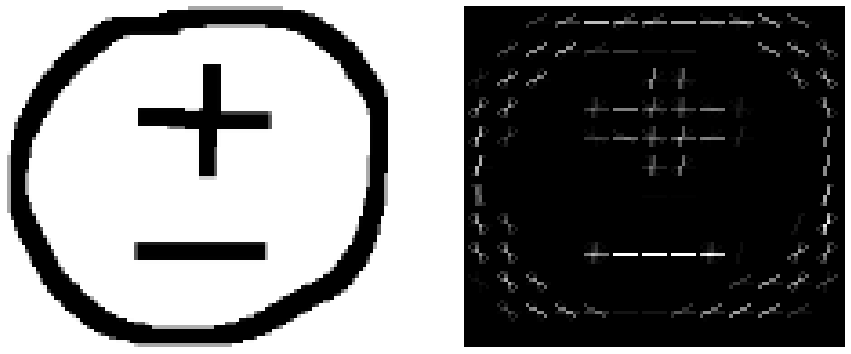

In [12]:
from cs347 import get_hog, plot_hog

# Compute hog representations of circuit components
image_voltagesource = imread('voltagesource.png', as_grey=True)
image_voltagesource = rescale(image_voltagesource, 0.6)

(hog_voltagesource, hog_image_voltagesource) = hog_feature(image_voltagesource)

plot_hog(image_voltagesource, hog_image_voltagesource)

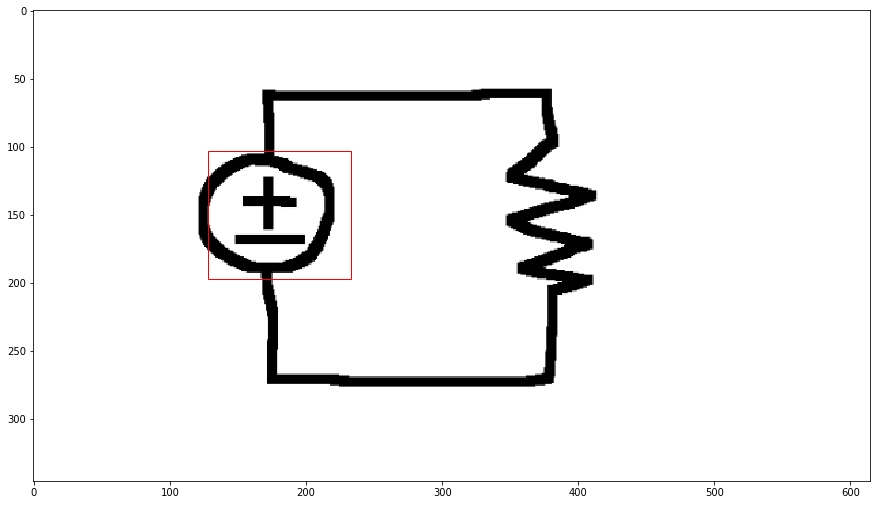

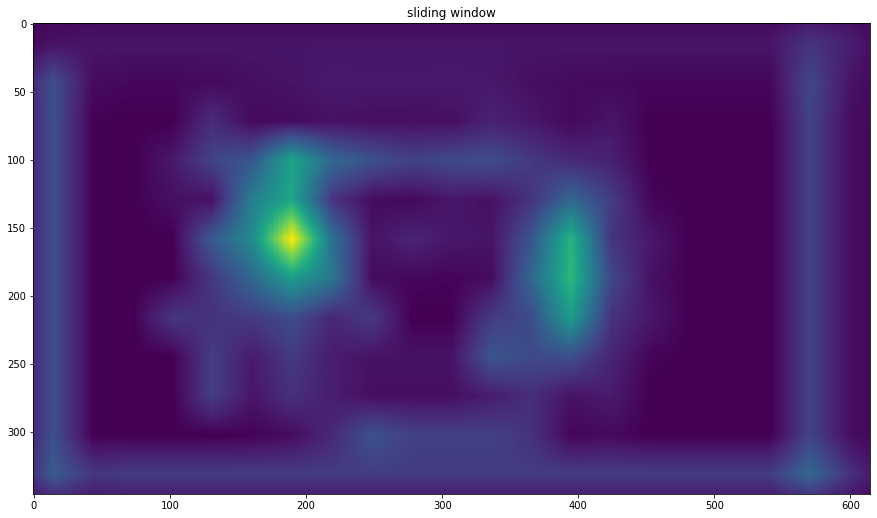

In [18]:
from cs347 import sliding_window, plot_prediction, plot_heatmap

image = io.imread('circuit1.png', as_grey=True)
image = rescale(image, 0.9)

(hog, hogImage) = get_hog(image)

(winH, winW) = image_voltagesource.shape
(score, r, c, response_map) = sliding_window(image, hog_voltagesource, stepSize=30, windowSize=image_voltagesource.shape)
crop = image[r:r+winH, c:c+winW]

plot_prediction(image, r, c, winW, winH)
plot_heatmap(response_map)

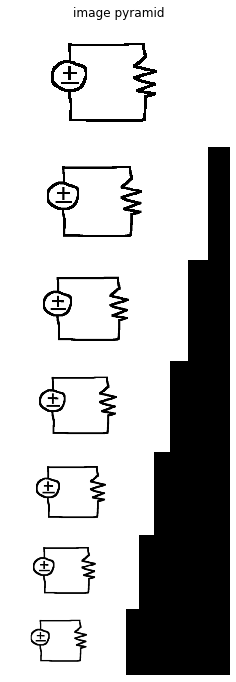

In [17]:
from cs347 import pyramid, plot_part3_1

image_path = 'circuit1.png'

image = io.imread(image_path, as_grey=True)

images = pyramid(image, scale = 0.9)

plot_part3_1(images)

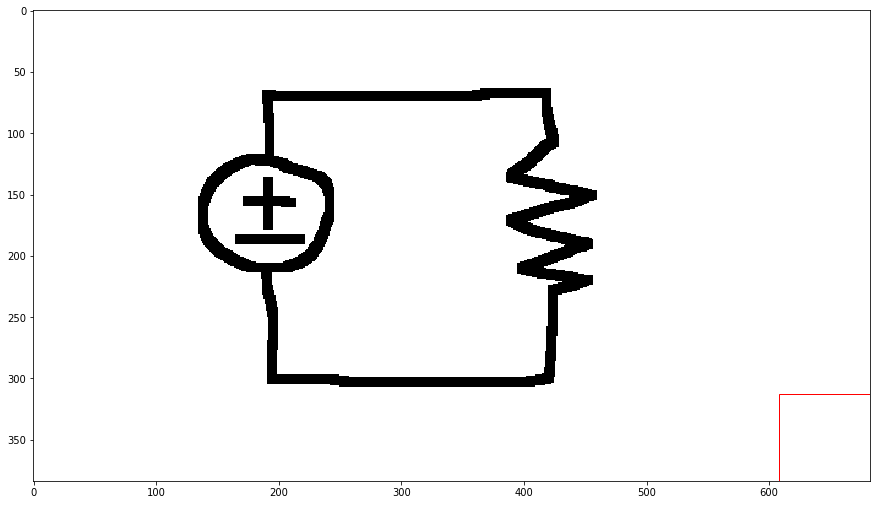

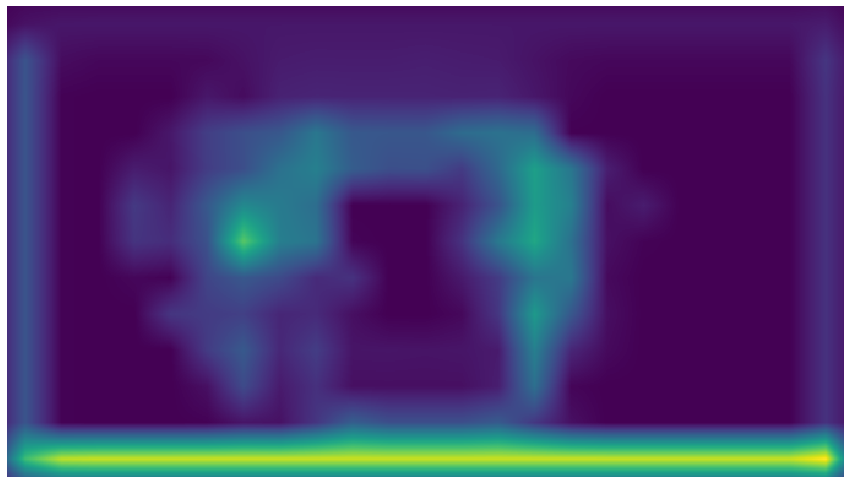

In [41]:
from cs347 import pyramid_score, plot_part3_2

image_path = 'circuit1.png'

image = io.imread(image_path, as_grey=True)

(winH, winW) = face_shape
max_score, maxr, maxc, max_scale, max_response_map = pyramid_score \
        (image, face_feature, face_shape, stepSize = 30, scale=0.8)

plot_part3_2(image, max_scale, winW, winH, maxc, maxr, max_response_map)